## Definición de clases fundamentales y funciones básicas

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math

In [17]:

class Points:
    def __init__(self, coordinates, label=None):
        self.x = coordinates[0]
        self.y = coordinates[1]
        self.label = label

def cross_product(p, q, r):
    """Calcula el producto cruzado para determinar la orientación de tres puntos."""
    val = (q.x - p.x) * (r.y - p.y) - (q.y - p.y) * (r.x - p.x)
    if abs(val) < 1e-10:  
        return 0
    return 1 if val > 0 else -1  # 1 = giro a la derecha, -1 = giro a la izquierda

def find_p0(points):
    """Encuentra el punto con menor coordenada x (y si hay empate, el de menor y)."""
    p0 = points[0]
    for p in points[1:]:
        if p.x < p0.x or (p.x == p0.x and p.y < p0.y):
            p0 = p
    return p0

def generate_random_points(N, low_value, high_value, integer=True): 
    """Genera N puntos aleatorios en un rango especificado."""
    coordinates = []
    for i in range(N):
        x = int(np.random.uniform(low_value, high_value)) if integer else np.random.uniform(low_value, high_value)
        y = int(np.random.uniform(low_value, high_value)) if integer else np.random.uniform(low_value, high_value)
        label = f"P{i+1}"
        p = Points((x, y), label)
        coordinates.append(p)
    return coordinates

def sort_points(p0, points):
    """Ordena los puntos por ángulo polar respecto a p0."""
    def polar_angle(p):
        return math.atan2(p.y - p0.y, p.x - p0.x)  # Usa atan2 para manejar todos los casos
    def slope(p):
        if p.x == p0.x:
            return 0  # Punto vertical
        return (p.y - p0.y) / (p.x - p0.x)  # Calcula la pendiente

    sorted_points = sorted(points, key=slope)
    return sorted_points

def right_turn(p0, p1, p2):
    """Determina si el giro es a la derecha."""
    return cross_product(p0, p1, p2) == 1

def visualize_hull(points, stack_final, pause=0.5):
    """Muestra la construcción progresiva del convex hull."""
    plt.clf()
    
    # Dibujar todos los puntos
    x = [p.x for p in points]
    y = [p.y for p in points]
    plt.scatter(x, y, c='blue', label="Puntos")

    # Dibujar la envolvente convexa
    if len(stack_final) > 1:
        hull_x = [p.x for p in stack_final]
        hull_y = [p.y for p in stack_final]
        plt.plot(hull_x, hull_y, 'r-', linewidth=2, label="Convex Hull")
        plt.scatter(hull_x, hull_y, c='red', marker='o')
        for p in stack_final:
            plt.text(p.x, p.y, p.label, fontsize=8, ha='right', va='bottom', color='black')


    plt.legend()
    plt.draw()
    plt.pause(pause)

def convex_hull(points):
    """Calcula la envolvente convexa de un conjunto de puntos usando Graham Scan."""
    if len(points) < 3:
        return points  # Si hay menos de 3 puntos, la envolvente es el conjunto mismo

    p0 = find_p0(points)  # Encuentra el punto más bajo (o más a la izquierda)
    sorted_points = sort_points(p0, points)  # Ordenar los puntos por ángulo
    stack_final = [p0, sorted_points[0]]  # Inicializar con los dos primeros puntos

    plt.ion()  # Modo interactivo activado
    plt.figure()

    for point in sorted_points[1:]:
        while len(stack_final) >= 2 and not right_turn(stack_final[-2], stack_final[-1], point):
            stack_final.pop()  # Si no es giro a la derecha, eliminamos el último punto
        stack_final.append(point)
        visualize_hull(points, stack_final)  # Actualizar visualización en cada iteración

    # Cerrar la envolvente convexa
    stack_final.append(stack_final[0])  # Volver al punto inicial para cerrar el polígono
    visualize_hull(points, stack_final)  

    plt.ioff()  # Modo interactivo desactivado
    plt.show()
    
    return stack_final

def print_points(points):
    """ arreglo de Puntos que componen la envolvente convexa """
    for i in points:
        print(f"{i.label} ({i.x}, {i.y})")




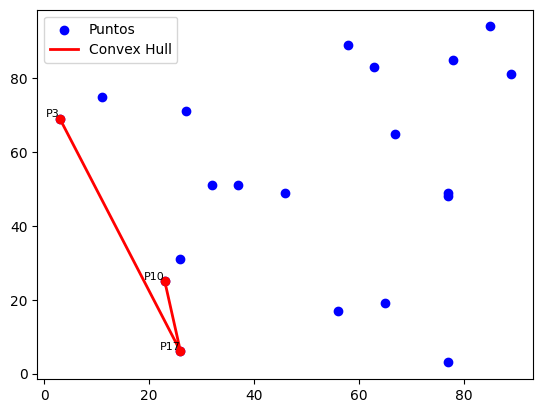

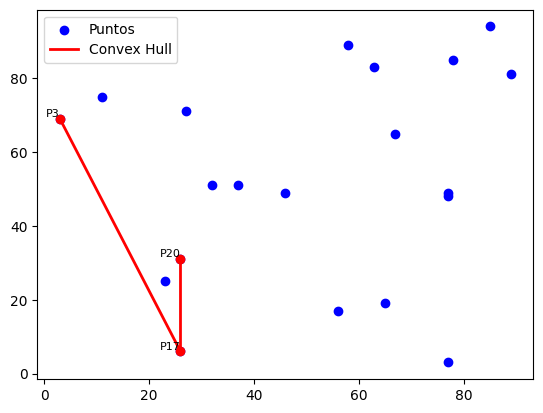

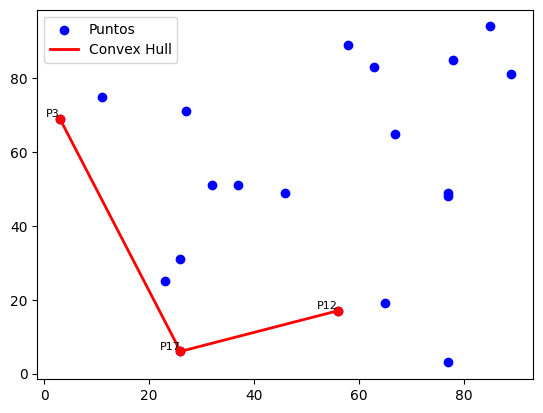

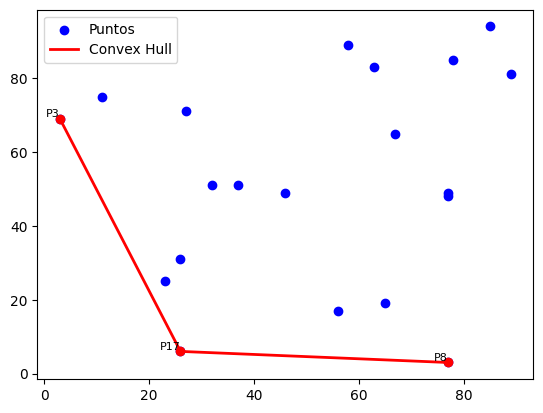

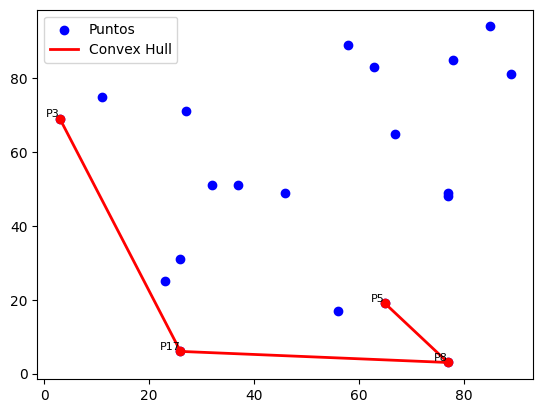

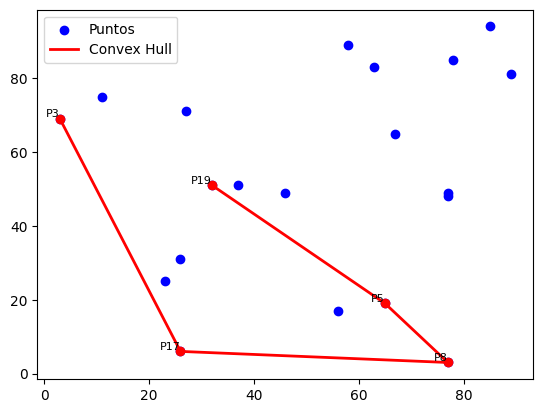

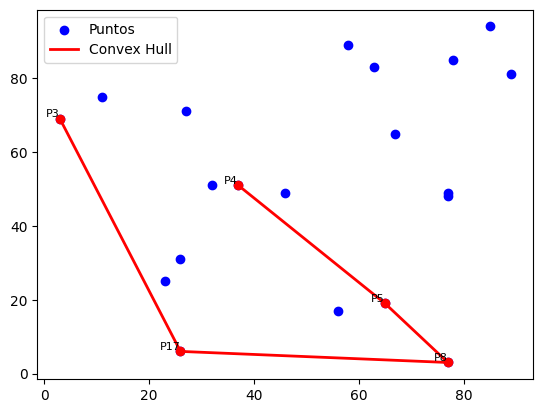

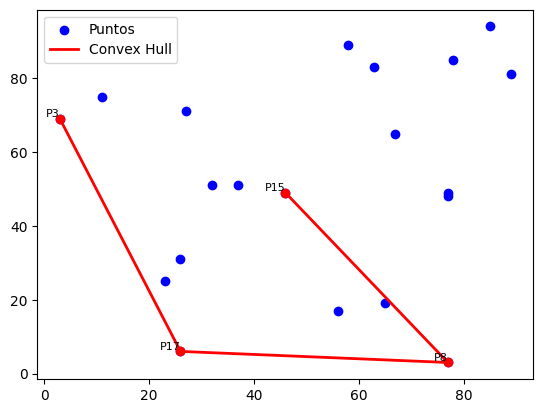

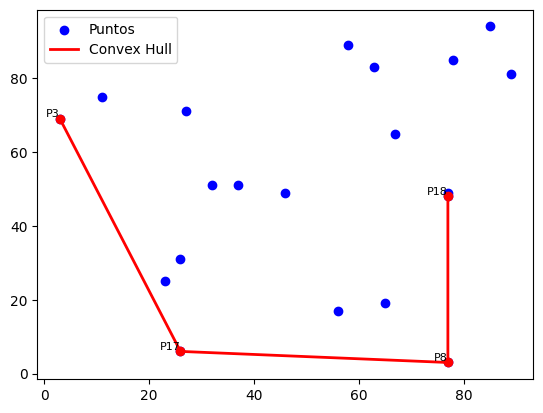

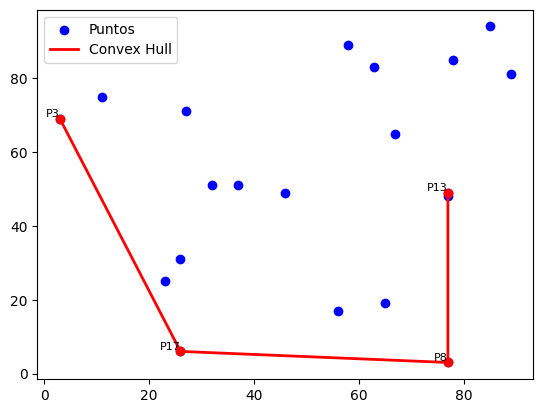

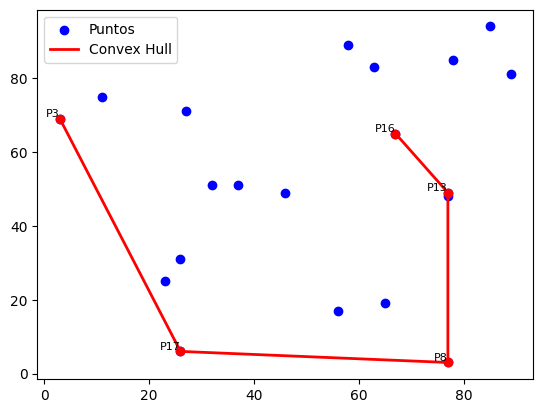

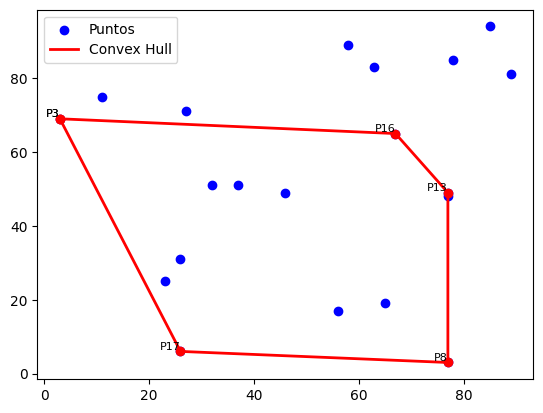

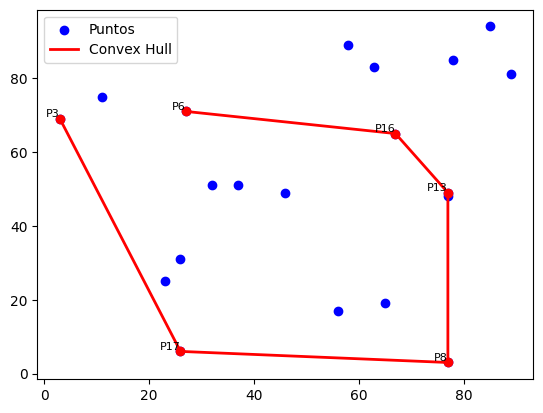

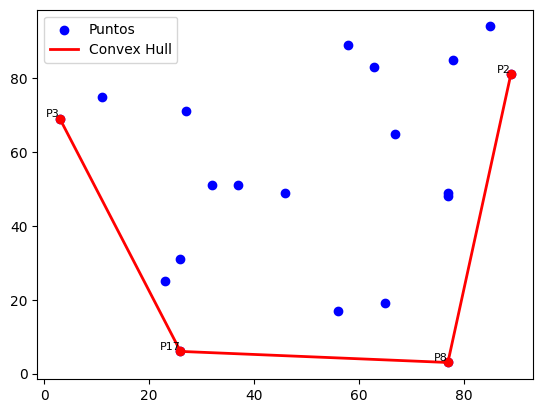

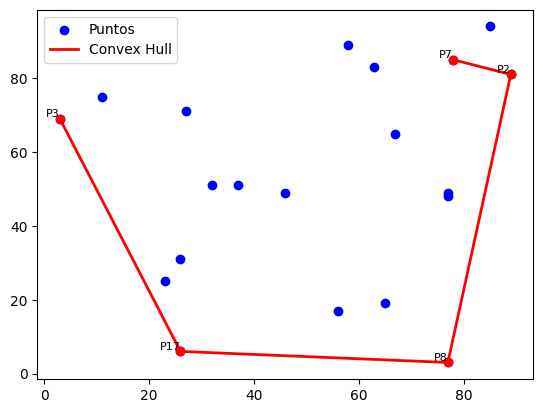

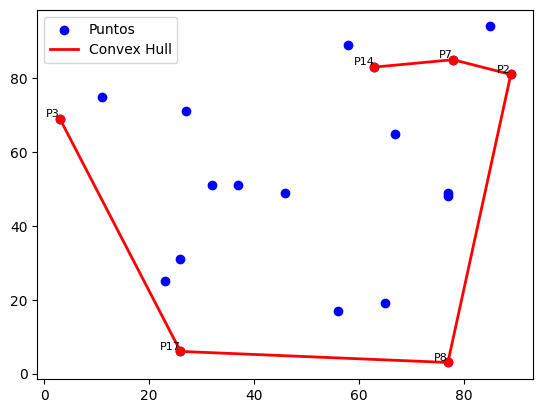

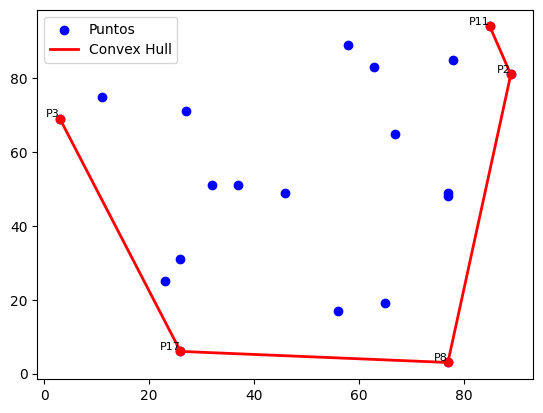

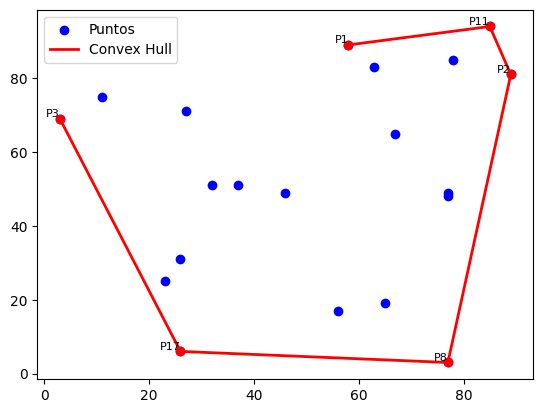

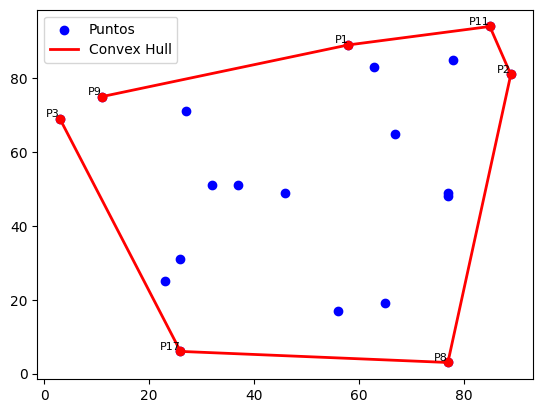

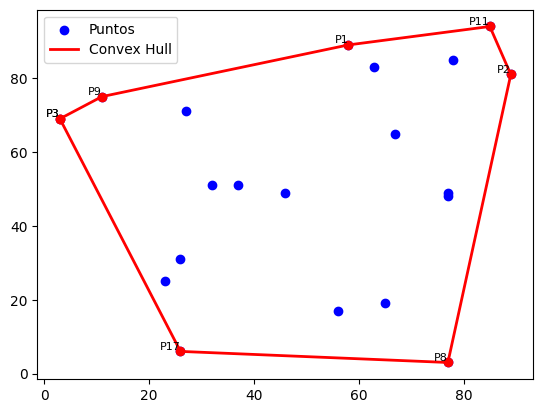

In [20]:

# Prueba con puntos aleatorios
np.random.seed(20)  # Para reproducibilidad
random_points = generate_random_points(20, 0, 100)  # 20 puntos en un espacio de 100x100
points_convex=convex_hull(random_points)

In [19]:
print_points(points_convex)

P6 (2, 96)
P3 (15, 15)
P19 (30, 9)
P15 (59, 4)
P7 (83, 21)
P18 (96, 80)
P1 (37, 95)
P6 (2, 96)
P6 (2, 96)
